In [4]:
import sys
sys.path.append("../") 
import nozzleFactory
import refProp
import numSolvers
import nozzleSolver
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import time
import importlib
import scipy.optimize
from UseCases.pressurePlots import loadsolver

In [5]:
pd.set_option('display.expand_frame_repr', False)
%matplotlib notebook

In [6]:
    nozzle = nozzleFactory.ConicConic(1.0, 2.905,0.2215, 1.4116, 0.345 )
    nozzle.setFriction( 1.0e-2 )
    print(nozzle)
    Nint = 250
    fluid = "BUTANE"
    nsolver = nozzleSolver.NozzleSolver(nozzle, fluid, Nint)

Axis symmetric Nozzle with :
inlet cross section 3.141592653589793 cm^2 
throat cross section 0.15413360416858587 cm^2 
throat diameter 0.44300000000000006 cm 
outlet cross section 0.3739280655935249 cm^2 
outlet diameter 0.6899999999999998 cm 
Length 4.316599999999999 cm 
The throat is at 2.905 cm from the inlet 
Friction coefficient 0.01 



Set 21 bar, and only 70 Celsius Temperature!

In [7]:
vin = 3.51
pin = 2100 # KPa
fluid= "BUTANE"
Tin = 273.15 + 70  # K

In [8]:
RP = refProp.setup(fluid)
[Din, hin] =  refProp.getDh_from_TP(RP, Tin, pin)

<IPython.core.display.Javascript object>


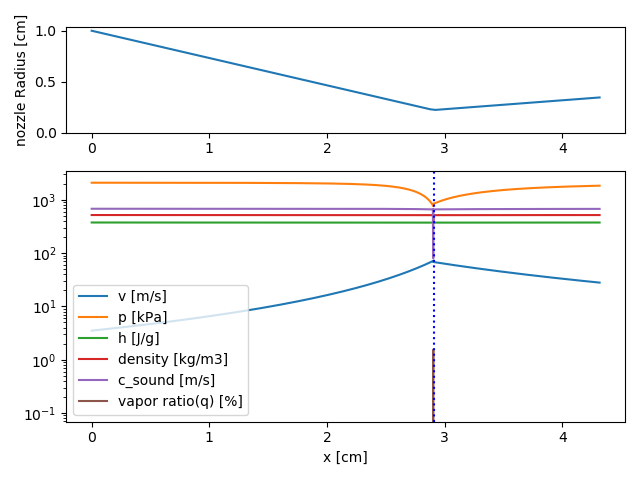

In [12]:
res = nsolver.solveNplot( vin, pin , hin)

In [35]:
 res[( abs(res['x'] - nsolver.nozzle.xt) < 0.01 )]

,x,v,p,h,d,c,mach,quality
747,2.895508,70.307543,822.965370,373.680100,516.558014,663.458323,0.105971,0.000000
748,2.896375,70.455229,817.596152,373.669706,516.545815,663.380003,0.106206,0.000000
749,2.897240,70.603079,812.209808,373.659278,516.533574,663.301412,0.106442,0.000000
750,2.898103,70.751094,806.806299,373.648817,516.521289,663.222544,0.106678,0.000000
751,2.898964,70.899273,801.385586,373.638322,516.508965,663.143415,0.106914,0.000000
752,2.899824,71.047616,795.947630,373.627794,516.496598,663.064010,0.107150,0.000000
753,2.900682,71.196124,790.492392,373.617232,503.146011,220.748631,0.322521,0.001053
754,2.901538,71.384149,783.976039,373.603830,466.919435,123.473475,0.578133,0.004177
755,2.902392,71.649526,775.470116,373.584856,426.008610,95.942217,0.746799,0.008259
756,2.903245,72.090940,762.656704,373.553155,374.958799,81.469850,0.884879,0.014418


In [36]:
res.tail(3)

,x,v,p,h,d,c,mach,quality
1828,4.313841,224.284526,89.167559,351.00213,5.815844,128.716356,1.742471,0.411134
1829,4.315893,224.379295,89.044014,350.98087,5.806665,128.730349,1.743018,0.411256
1830,4.316600,224.411918,89.001518,350.97355,5.803509,128.735162,1.743206,0.411298
